## Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as st

In [2]:
import torch
torch.cuda.current_device()

0

## №1

#### Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже. ####

In [3]:
df = pd.DataFrame({'День': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'], 
                   'Улица': [80, 98, 75, 91, 78],
                   'Гараж': [100, 82, 105, 89, 102]})
df

,День,Улица,Гараж
0,Понедельник,80,100
1,Вторник,98,82
2,Среда,75,105
3,Четверг,91,89
4,Пятница,78,102


In [4]:
var1 = df['Улица'].to_numpy()
var2 = df['Гараж'].to_numpy()

## №1.1
#### Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону). ####

In [5]:
np.corrcoef(var1, var2)[0,1]

-0.9999999999999998

In [6]:
corr, p_value = st.pearsonr(var1, var2)
print(corr)
print(p_value)

-1.0
0.0


Коэффициент корреляции практически равен –1, что указывает на полностью обратную линейную зависимость.

## №1.2
#### Построить диаграмму рассеяния для вышеупомянутых переменных. ####

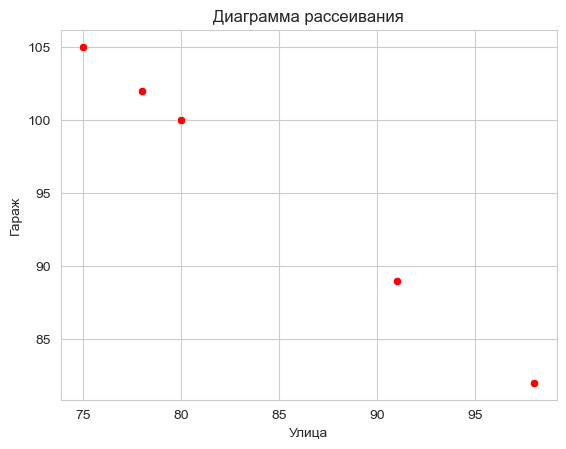

In [7]:
sns.scatterplot(x=var1, y=var2, color='r')
plt.grid(True)
plt.title('Диаграмма рассеивания')
plt.xlabel('Улица')
plt.ylabel('Гараж')

plt.show()

## №2

#### Найти и выгрузить данные. Вывести, провести предобработку и описать признаки. ####

Набор данных о рекламе отражает доходы от продаж, полученные в связи с расходами на рекламу по нескольким каналам, таким как радио, телевидение и газеты.
Признаки:
* TV - Затраты на ввод рекламы на телевидении.
* Radio - Затраты на ввод рекламы на радио.
* Newspaper - Затраты на ввод рекламы в газетах.
* Sales - Продажи рекламируемого товара. (target)

In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df2 = pd.read_csv("C:\\Users\Katy\Documents\Mirea\\7 сем\Бигдата\\4ПР\housing.csv", header=None, delimiter=r"\s+", names=column_names)
# df2 = pd.read_csv("C:\\Users\Katy\Documents\Mirea\\7 сем\Бигдата\\4ПР\Advertising.csv")

In [9]:
df2.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
df2.duplicated().sum()

0

Датафрейм не имеет пропусков и дубликатов, далее нормализуем данные.

In [11]:
# min_max_scaler = preprocessing.MinMaxScaler()
# col = df2.columns
# result = min_max_scaler.fit_transform(df2)
# df2 = pd.DataFrame(result, columns=col)
# df2

## №2.1

#### Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте. ####

In [12]:
corr_matrix = df2.corr().MEDV.abs().to_frame()
# corr_matrix = df2.corr().sales.abs().to_frame()
corr_matrix 

,MEDV
CRIM,0.388305
ZN,0.360445
INDUS,0.483725
CHAS,0.175260
NOX,0.427321
RM,0.695360
AGE,0.376955
DIS,0.249929
RAD,0.381626
TAX,0.468536


<Axes: >

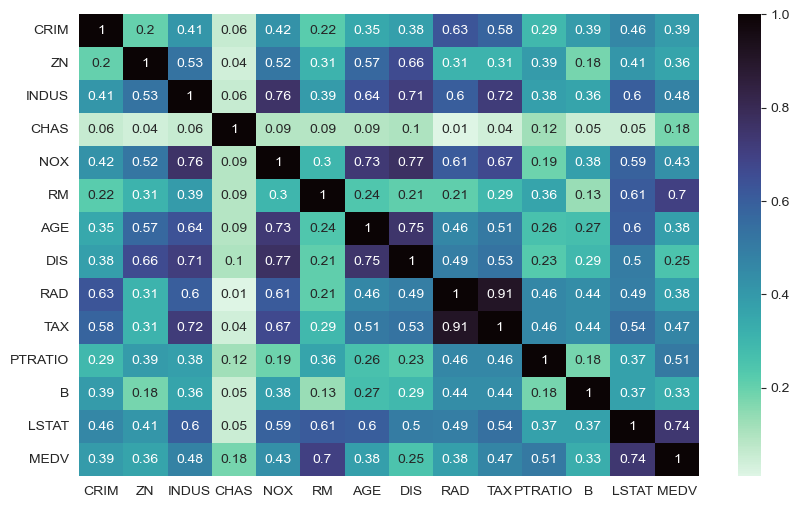

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(round(df2.corr(),2).abs(), annot = True, cmap= 'mako_r')

Наиболее коррелируемая переменная - LSTAT.

## №2.2

#### Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE. ####

In [14]:
# X = df2[['TV']]
# y = df2['sales']
X = df2[['LSTAT']]
y = df2['MEDV']

X = np.array(X,type(float))
y = np.array(y,type(float))

Линейная регрессия с помощью библиотеки sklearn.

In [15]:
model = LinearRegression()
model.fit(X,y)
model.coef_, model.intercept_

(array([-0.95004935]), 34.55384087938311)

In [16]:
model_y_sklearn = model.coef_[0] * X + model.intercept_
mse_sklearn = mean_squared_error(model_y_sklearn, y)

Линейная регрессия вручную.

In [17]:
def mse(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

def grad(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X) * np.sum((y - y_pred)) * (-1),
                     2/len(X) * np.sum((y - y_pred) * (-X[:, 0]))])

In [18]:
eps = 0.0001
lr = 0.001

w1 = 0
w0 = 0

next_w1 = w1
next_w0 = w0

n = 100000
for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0
    
    next_w0 = cur_w0 - lr * grad(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - lr * grad(X, cur_w1, cur_w0, y)[1]
    
    print(f"Итерация: {i}")
    print(f"Текущая точка: {cur_w1, cur_w0} | Следующая точка: {next_w1, next_w0}")
    print(f"MSE: {mse(X, cur_w1, cur_w0, y)}")
    mse_our_model = mse(X, cur_w1, cur_w0, y)
    print("_______________________________________________________")
    
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

Итерация: 0
Текущая точка: (0, 0) | Следующая точка: (0.47351446245059275, 0.04506561264822139)
MSE: 592.1469169960473
_______________________________________________________
Итерация: 1
Текущая точка: (0.47351446245059275, 0.04506561264822139) | Следующая точка: (0.7460710784950231, 0.07805827719321426)
MSE: 413.7503221123069
_______________________________________________________
Итерация: 2
Текущая точка: (0.7460710784950231, 0.07805827719321426) | Следующая точка: (0.9027771628467389, 0.10408760420993274)
MSE: 354.27748122108596
_______________________________________________________
Итерация: 3
Текущая точка: (0.9027771628467389, 0.10408760420993274) | Следующая точка: (0.9926964621638432, 0.12609924858148083)
MSE: 334.32839505561253
_______________________________________________________
Итерация: 4
Текущая точка: (0.9926964621638432, 0.12609924858148083) | Следующая точка: (1.0441138687700233, 0.14579136050257518)
MSE: 327.51496214717235
_________________________________________

## №2.3

#### Визуализировать регрессию на графике. ####

C:\Users\Katy\AppData\Local\Temp\ipykernel_23888\1226958073.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X, our_model_y, '--g', linewidth = 2, color = 'y', label = f'Вручную = {next_w1:.2f}x + {next_w0:.2f}, MSE: {round(mse_our_model, 2)}')


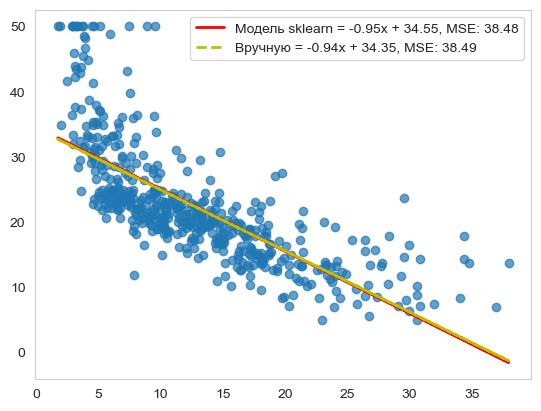

In [19]:
our_model_y = next_w1 * X + next_w0

plt.plot(X, model_y_sklearn, linewidth = 2, color = 'r', label = f'Модель sklearn = {model.coef_[0]:.2f}x + {model.intercept_:.2f}, MSE: {round(mse_sklearn, 2)}')
plt.plot(X, our_model_y, '--g', linewidth = 2, color = 'y', label = f'Вручную = {next_w1:.2f}x + {next_w0:.2f}, MSE: {round(mse_our_model, 2)}')
plt.scatter(X, y, alpha=0.7)
plt.grid()
plt.legend()

## №3

#### Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов. ####

In [576]:
df3 = pd.read_csv("C:\\Users\Katy\Documents\Mirea\\7 сем\Бигдата\\4ПР\insurance.csv")
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [577]:
df3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [578]:
df2.duplicated().sum()

0

Список уникальных регионов.

In [534]:
df3['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## №3.1

#### Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy. ####